In [52]:
# Importing libraries and packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/Users/anetasullivan/Downloads/waze_dataset.csv')
df. head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [55]:
# Isolating rows with null values
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [56]:
# Isolating rows without null values
not_null_df = df[df['label'].notnull()]

# Displaying summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The mean and standard deviation values appear to be quite similar between both groups.

In [57]:
# Getting count of null values by device
null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

In [58]:
# Calculating % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)



device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [59]:
# Calculating % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

Based on the data, each device's percentage of missing values is proportional to its overall representation. There are no signs of any non-random factors causing the missing data.

In [60]:
# Calculating counts of churned vs. retained

print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))

'''This dataset contains 82% retained users and 18% churned users. -> calculate: the median and NOT the mean = not having outliers to affect the portrayal of a typical user
'''

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


'This dataset contains 82% retained users and 18% churned users. -> calculate: the median and NOT the mean = not having outliers to affect the portrayal of a typical user\n'

In [61]:
# Calculating median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [62]:
# Groupping data by `label` and calculate the medians
medians_by_label = df.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')

# Dividing the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

The median user from both groups drove ~73 km/drive

In [63]:
# Divide the median distance by median number of driving days
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

In [64]:
# Divide the median number of drives by median number of driving days
print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

In [65]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [66]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The proportion of iPhone users and Android users remains stable in both the churned and retained groups, and these proportions align with the overall dataset ratio.

# SESSIONS

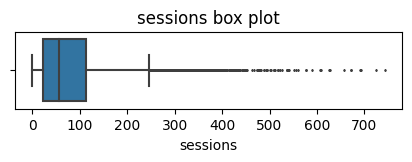

In [67]:
## How many times a user has opened the app throughout the month?
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

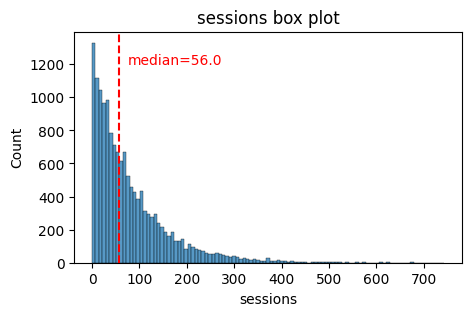

In [68]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions but thee boxplot shows that some users have more than 700.

# DRIVES

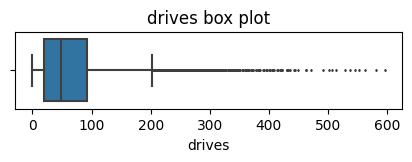

In [69]:
# Box plot of 'drives' (at least 1 km)
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

In [70]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

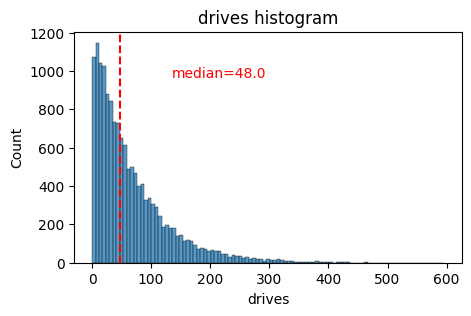

In [71]:
# Histogram
histogrammer('drives')

It is very similar to sessions variables - right-skewed with median 48 but some drivers had over 400 drives in the last month. 

# TOTAL SESSIONS

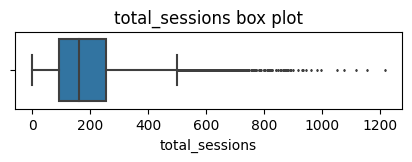

In [72]:
# Box plot of 'total_sessions'
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

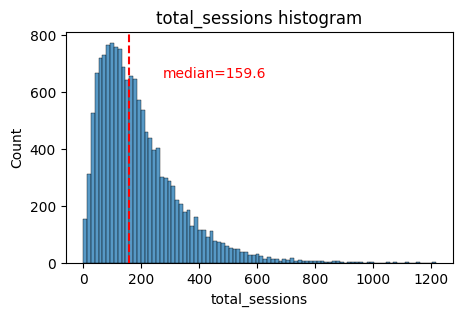

In [73]:
# Histogram
histogrammer('total_sessions')

The `total_sessions` distribution is also right-skewed with the median total number of sessions is 159.6 but the number of 'drives' in the last month was 48.
It indicates that further investigation is required to better understand this trend.

# THE NUMBER OF DAYS SINCE A USER SIGNED UP FOR THE APP

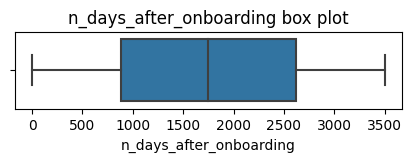

In [74]:
# Box plot of the number of days since a user signed up for the app
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


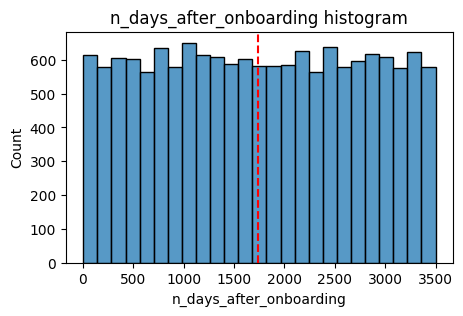

In [75]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user amount of days since onbording is a uniform distribution ranging from 0 - 3500 (~9.5 years).

# TOTAL KILOMETERS DRIVEN DURING THE MONTH

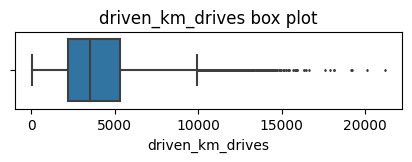

In [76]:
# Box plot of total kilometers driven during the month_
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

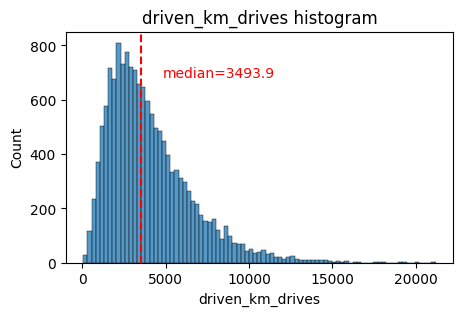

In [77]:
# Histogram
histogrammer('driven_km_drives')

Again, it is a right-skewed distribution with a median of 3493.9 kilomenters. 

# TOTAL DURATION DRIVEN IN MINUTES DURING THE MONTH

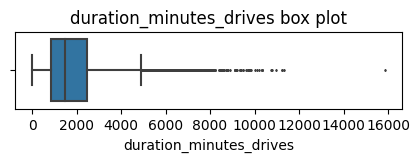

In [78]:
# Box plot of total duration driven in minutes during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

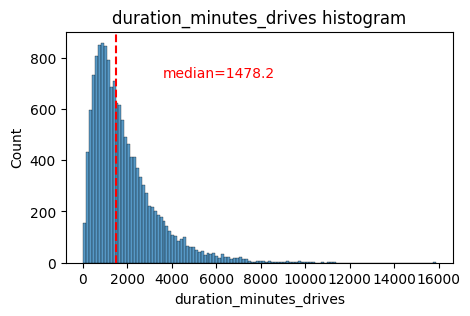

In [79]:
# Histogram
histogrammer('duration_minutes_drives')

It has a heavily skewed right tail, meaning that some users drove far more than others. Approximately half of the users drove for less than 1,478 minutes (equivalent to around 25 hours), while some users drove for over 250 hours during the month.

# NUMBER OF DAYS THE USER OPENED THE APP DURING THE MONTH

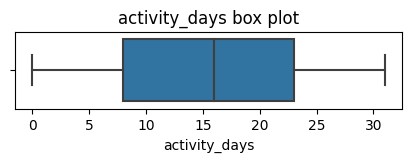

In [80]:
# Box plot of number of days the user opens the app during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


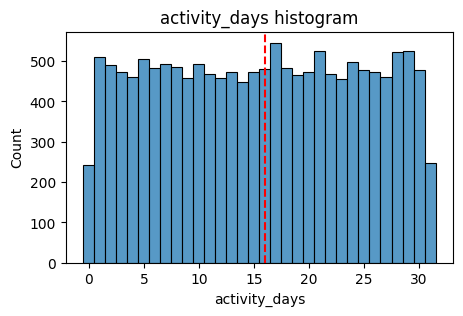

In [81]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

In the past month, users opened the app about 16 times on average. The box plot indicates that the distribution is centered. 
The histogram shows almost uniform distribution with around 500 individuals opening the app each day but ~ 250 people didn't open the app at all, and approximately 250 individuals opened it every day of the month.

This distribution doesn't reflect the distribution of "sessions," which one might assume would be closely associated with "activity days."

# NUMBER OF DAYS THE USER DRIVES (MORE THAT 1 KM) DURING THE MONTH

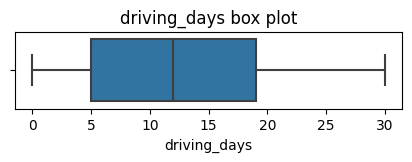

In [82]:
# Box plot of number of days the user drives (at least 1 km) during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


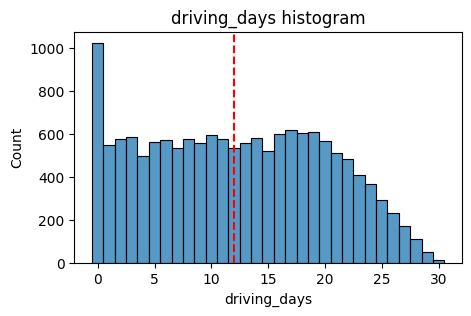

In [83]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The amount of days that users drove is consistent and is closely linked to the number of times they opened the app during that month.
Except the distribution of "driving_days" decreases on the higher end of the spectrum -- there were nearly twice as many users who did not drive at all during the month compared to those who did (\~1,000 vs. \~550) which contradicts with the data from "activity_days". 
That showed that there were about 500 users opening the app on most days, but only around 250 users who did not open the app at all during the month and another 250 who opened it every day. 

-> needs further investigation at a later time.

# DEVICES

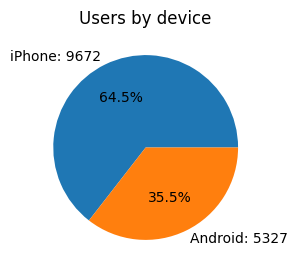

In [84]:
# Pie chart of devices
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There is almost twice as many iPhone users than Android. 

# LABEL (churned vs retained)

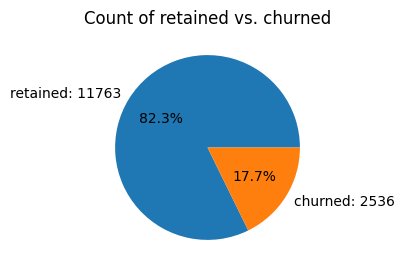

In [85]:
# Pie chart of retained vs churned
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of users churned. 

# DRIVING_DAYS vs ACTIVITY_DAYS

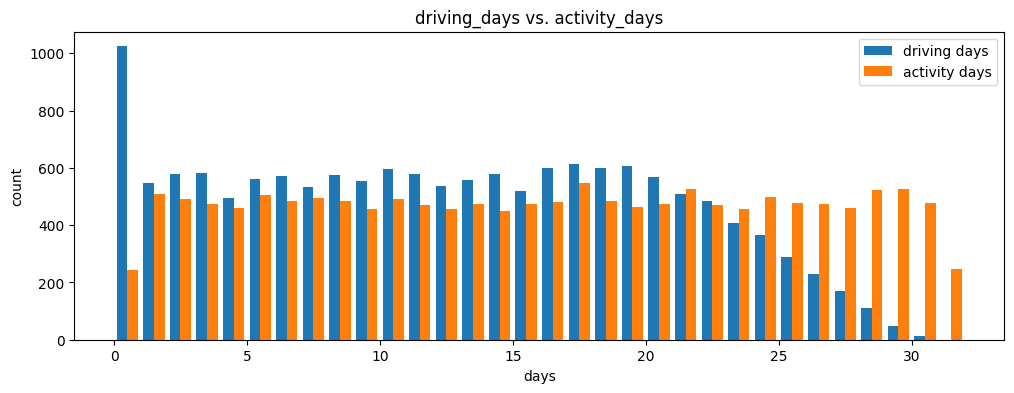

In [86]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

Fewer people didn't use the app, and more didn't drive during the month.
It could mean that some people opened the app for route info, updates, or mistakes more than for driving.
Also, there is not the same number of days between those two variables. 

Going to check the maximum number of days for each variable - 'driving_days' and 'activity_days.'

In [87]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


True, two variable have different number of days. 

Have to verify the accuracy of these variables and create a scatter plot with the x-axis displaying one variable and the y-axis displaying the other.

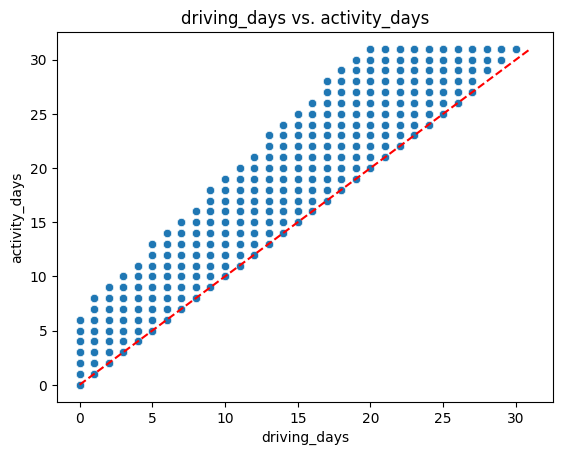

In [88]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

The theoretical limit (red line) shows that there cannot be more 'drive_days' than 'activity_days' which means that the sample is good. 

# RETENTION by device

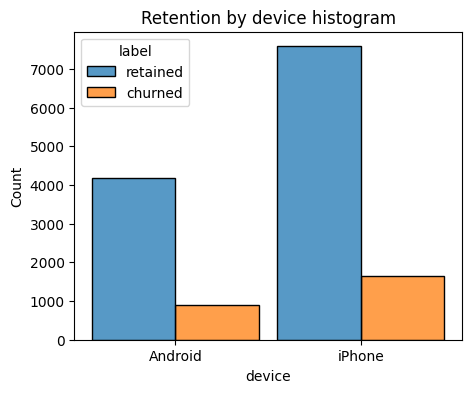

In [89]:
# Histogram of retention by device
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

It is pretty consistance between the two devices.

# RETENTION by kilometers driven per driving day

In the beginning, I descovered that the median dostance driven last month who churned was 8.33km and for people who didn't churn was 3.36km. 

Going to investigate further:


In [90]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The `driving_days` column contains zero values, which resulted in the creation of a new column with infinity values in the corresponding rows. 
This was done by Pandas as division by zero is undefined.

In [91]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

It tells us that maximum kilometer driven a day is 15420.23 which is impossible.
The maximum possible kilometer a day that I'm going to use is 1200 km/day (100km/hr for 12 hours).

Discarding any values ove 1200 km/day and plotting a new histogram of 'km_per_driving_day' column

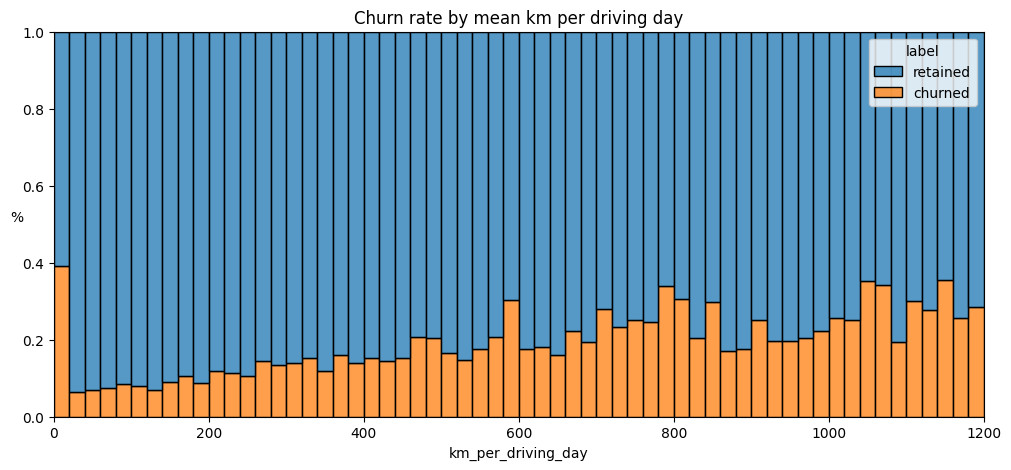

In [92]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

Based on this histogram and other previous findings, the churn rate rises with an increase in the average daily distance driven. 
Why long-distance users stop using the app?

# CHURNED rate per number of driving days

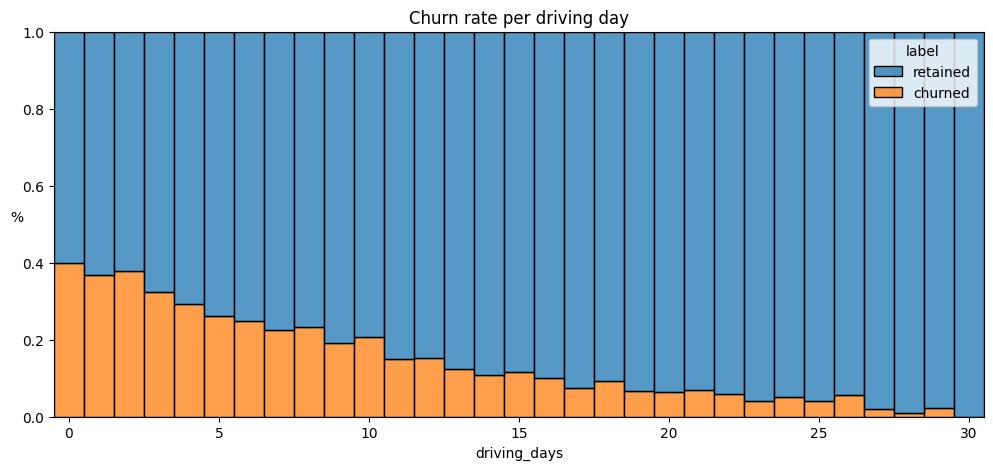

In [93]:
# Histogram 
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

Users who used Waze less in the previous month had a higher churn rate -- 40% of those who didn't use the app at all in the previous month churned.
Frequent users had a lower tendency to churn. 
None of the users who used it for 30 days churned.

This means that high churn rates among frequent users indicate dissatisfaction, while infrequent users may have other reasons for churning.


# PROPORTION of sessions in the last month

In [94]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [95]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


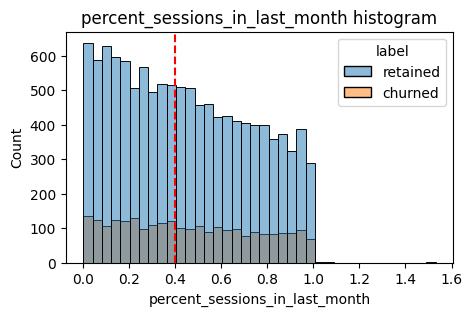

In [96]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [97]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

# Histogram of n_days_after_onboarding for just the people > 40% of their total sessions in the last month

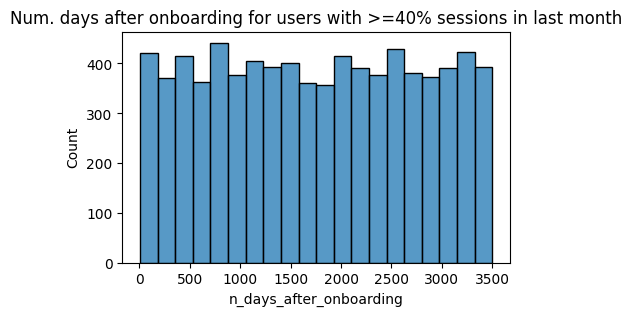

In [98]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

Long-time users have an even distribution of time since joining despite having 40% or more of their total sessions in the last month. This increase in usage raises questions that may require reaching out to Waze for an explanation.

# Handling Outliers

In [99]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [100]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [101]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


The churn rate is 17% for both iPhone and Android users. 
People who drive long distances are more likely to churn, while frequent drivers are less likely -> consult with the Waze data team to investigate this.